<a href="https://colab.research.google.com/github/fjadidi2001/AD_Prediction/blob/main/AD_JAN24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install datasets

> The Falah/Alzheimer_MRI Disease Classification dataset is a valuable resource for researchers and health medicine applications. This dataset focuses on the classification of Alzheimer's disease based on MRI scans. The dataset consists of brain MRI images labeled into four categories:

- '0': Mild_Demented
- '1': Moderate_Demented
- '2': Non_Demented
- '3': Very_Mild_Demented



In [6]:
from datasets import load_dataset

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Print the number of examples
print("Number of examples:", len(dataset))

# Print the structure of the first example
print("Structure of the first example:")
print(dataset[0])

# Print the keys of the first example (if it's a dictionary)
if isinstance(dataset[0], dict):
    print("Keys in the first example:", dataset[0].keys())

# Print the first few samples
print("Sample data:")
for example in dataset[:5]:
    print(example)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Number of examples: 5120
Structure of the first example:
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7B7575FED010>, 'label': 2}
Keys in the first example: dict_keys(['image', 'label'])
Sample data:
image
label


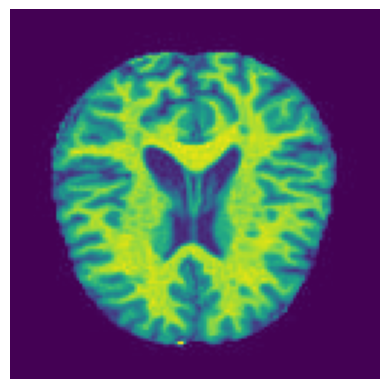

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming the image is stored under the key 'image' in the dataset
image = dataset[0]['image']

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

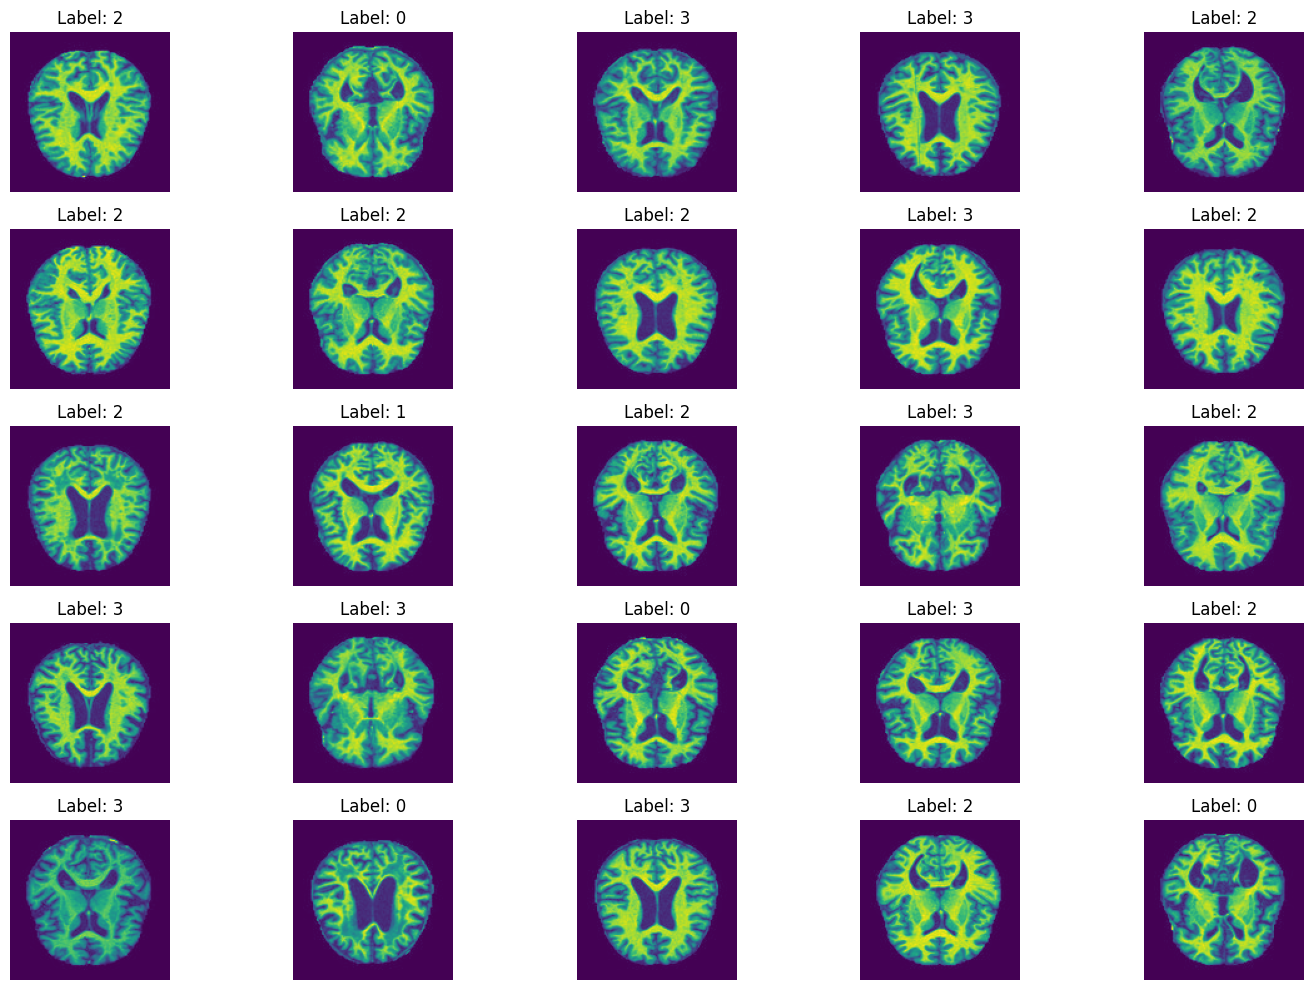

In [ ]:
# Display 25 images with their labels
plt.figure(figsize=(15, 10))  # Set the figure size
for i in range(25):
    # Get the image and label
    image = dataset[i]['image']
    label = dataset[i]['label']

    # Plot the image
    plt.subplot(5, 5, i + 1)  # Arrange images in a grid (2 rows, 5 columns)
    plt.imshow(image)  # Display the image
    plt.title(f"Label: {label}")  # Set the title as the label
    plt.axis('off')  # Hide the axes

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

Label distribution: Counter({2: 2566, 3: 1781, 0: 724, 1: 49})


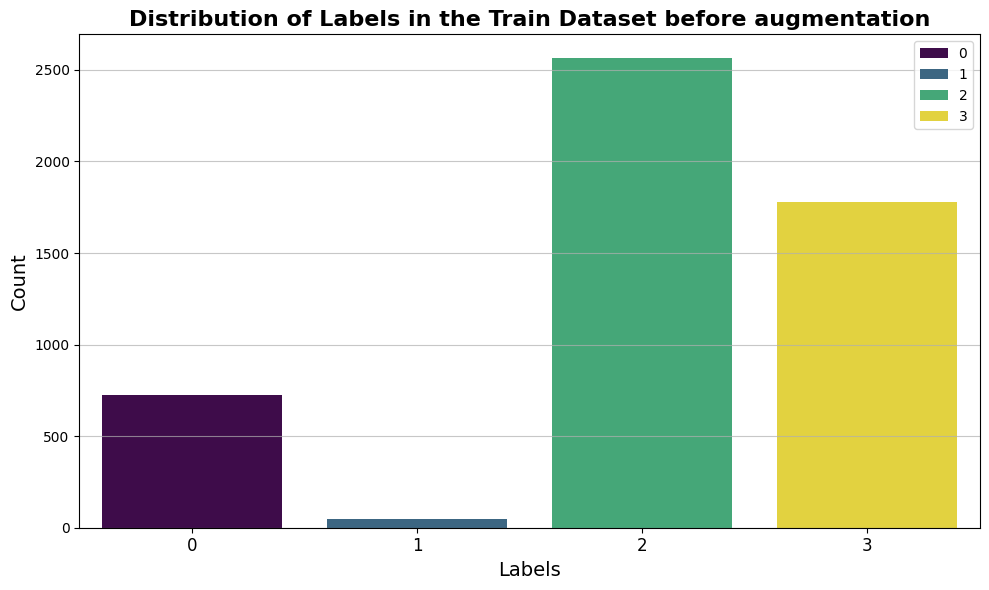

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Extract labels (assuming the key is 'label')
labels = [int(example['label']) for example in dataset]  # Convert labels to integers

# Count the occurrences of each label
label_counts = Counter(labels)

# Print the label distribution
print("Label distribution:", label_counts)

# Set a better color palette
sns.set_palette("muted")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis",hue=list(label_counts.keys()))

# Add labels and title
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Labels in the Train Dataset before augmentation', fontsize=16, fontweight='bold')

# Add grid lines for better readability
plt.grid(True, axis='y', linestyle='-', alpha=0.7)

# Customize x-axis to show only integer labels
plt.xticks(list(label_counts.keys()), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Label distribution: Counter({2: 634, 3: 459, 0: 172, 1: 15})


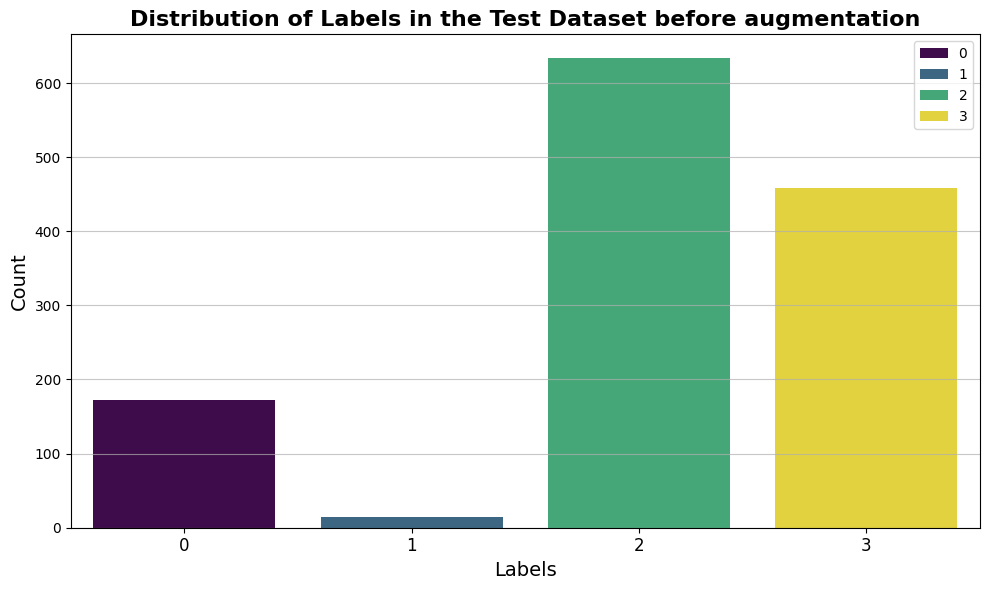

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='test')

# Extract labels (assuming the key is 'label')
labels = [int(example['label']) for example in dataset]  # Convert labels to integers

# Count the occurrences of each label
label_counts = Counter(labels)

# Print the label distribution
print("Label distribution:", label_counts)

# Set a better color palette
sns.set_palette("pastel")  # You can choose other palettes like "deep", "muted", "bright", etc.

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis",hue=list(label_counts.keys()))

# Add labels and title
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Labels in the Test Dataset before augmentation', fontsize=16, fontweight='bold')

# Add grid lines for better readability
plt.grid(True, axis='y', linestyle='-', alpha=0.7)

# Customize x-axis to show only integer labels
plt.xticks(list(label_counts.keys()), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

> Data augmentation is a powerful technique to increase the diversity of your training dataset by applying random transformations such as rotations, flips, zooms, and more. This helps improve the generalization of your model, especially when the dataset is small or imbalanced.



Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Shape before augmentation: (128, 128, 3)
Shape after augmentation: (128, 128, 3)
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Shape before augmentation: (128, 128, 3)
Shape after augmentation: (128, 128, 3)
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Shape before augmentation: (128, 128, 3)
Shape after augmentation: (128, 128, 3)
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Shape before augmentation: (128, 128, 3)
Shape after augmentation: (128, 128, 3)
Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Shape before augmentation: (128, 128, 3)
Shape after augmentation: (128, 128, 3)


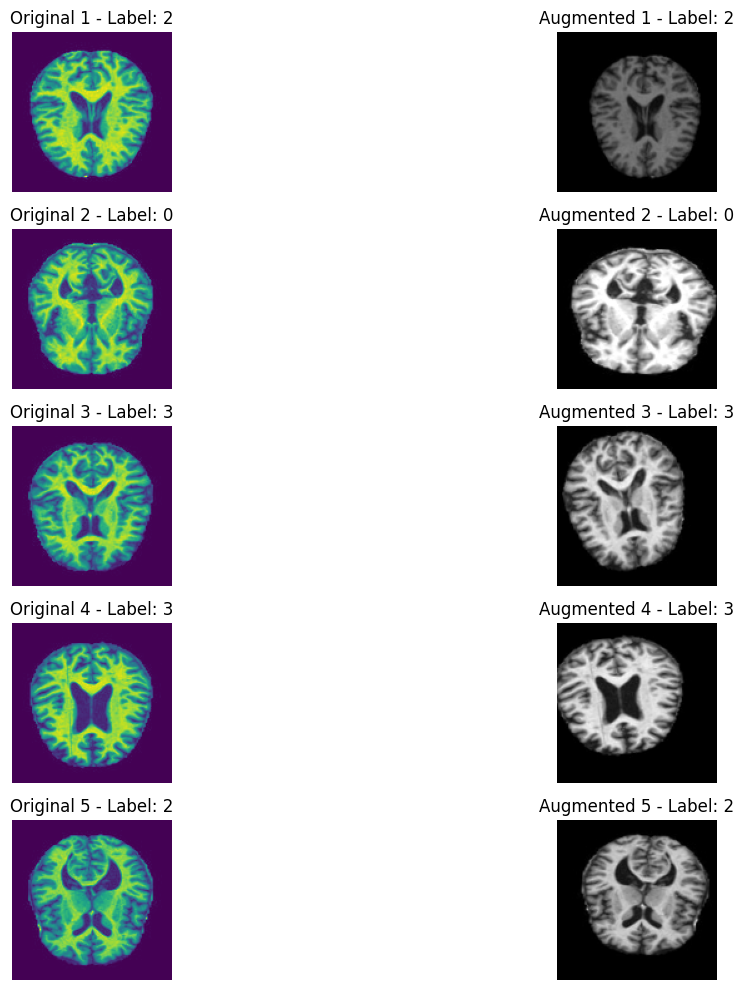

In [3]:
from datasets import load_dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Define augmentation transformations
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,       # Randomly rotate by up to 15 degrees
    width_shift_range=0.1,   # Randomly shift width by up to 10%
    height_shift_range=0.1,  # Randomly shift height by up to 10%
    horizontal_flip=True,    # Randomly flip horizontally
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    zoom_range=0.2,          # Randomly zoom by up to 20%
)

# Function to apply augmentation to an image
def augment_image(image):
    # Convert PIL image to NumPy array if necessary
    if not isinstance(image, np.ndarray):
        image = np.array(image)  # Convert PIL image to NumPy array

    # Ensure the image has 3 channels (RGB)
    if len(image.shape) == 2:  # If grayscale, convert to RGB
        image = np.stack((image,) * 3, axis=-1)  # Shape: (height, width, 3)
    elif len(image.shape) == 3 and image.shape[-1] == 4:  # If RGBA, convert to RGB
        image = image[:, :, :3]  # Keep only the first 3 channels

    # Print the shape of the image before augmentation
    print(f"Shape before augmentation: {image.shape}")

    # Add batch dimension: (1, height, width, channels)
    image = np.expand_dims(image, axis=0)

    # Apply augmentation
    augmented_image = next(datagen.flow(image, batch_size=1))[0]  # Use next() to get the augmented image

    # Print the shape of the image after augmentation
    print(f"Shape after augmentation: {augmented_image.shape}")

    return augmented_image

# Display original and augmented images with labels
plt.figure(figsize=(15, 10))
for i in range(5):  # Show 5 examples
    # Original image
    original_image = dataset[i]['image']  # Replace 'image' with the correct key
    label = dataset[i]['label']  # Replace 'label' with the correct key

    # Check the type of the image
    print(f"Image type: {type(original_image)}")

    # Display original image
    plt.subplot(5, 2, 2 * i + 1)
    plt.imshow(original_image)
    plt.title(f"Original {i+1} - Label: {label}")
    plt.axis('off')

    # Augmented image
    augmented_image = augment_image(original_image)
    plt.subplot(5, 2, 2 * i + 2)
    plt.imshow(augmented_image.astype(np.uint8))  # Ensure the image is in the correct format for display
    plt.title(f"Augmented {i+1} - Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

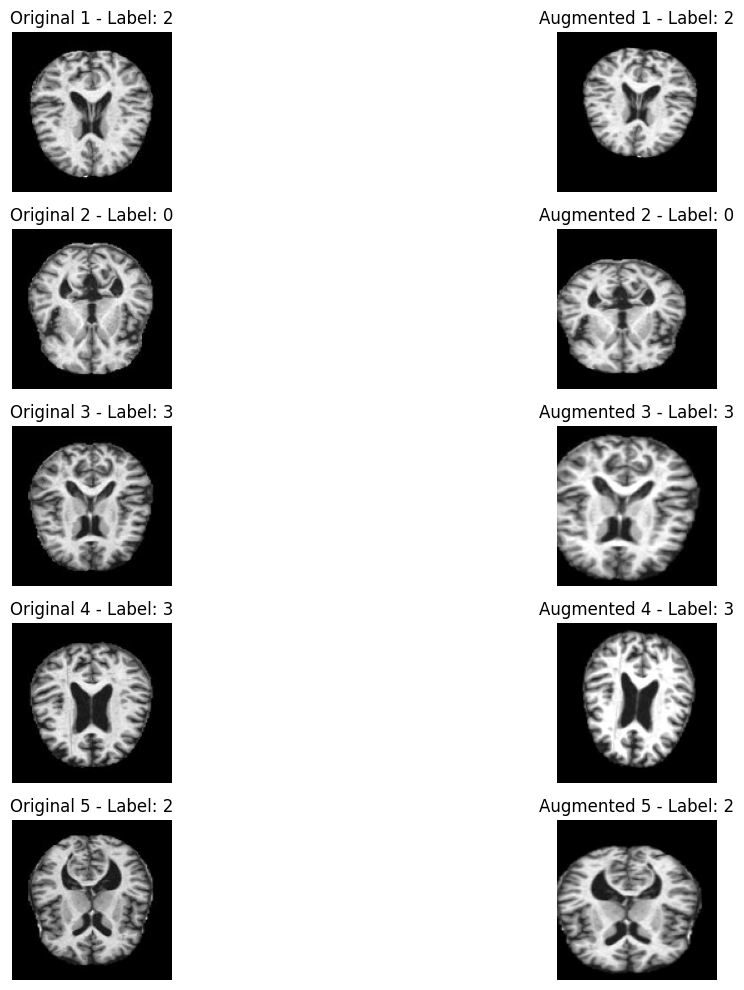

In [7]:
from datasets import load_dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageOps

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Define augmentation transformations for grayscale images
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,       # Randomly rotate by up to 15 degrees
    width_shift_range=0.1,   # Randomly shift width by up to 10%
    height_shift_range=0.1,  # Randomly shift height by up to 10%
    horizontal_flip=True,    # Randomly flip horizontally
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    zoom_range=0.2,          # Randomly zoom by up to 20%
)

# Function to convert image to grayscale
def to_grayscale(image):
    if isinstance(image, np.ndarray):
        if len(image.shape) == 3 and image.shape[-1] == 3:  # If RGB, convert to grayscale
            image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    else:  # If PIL image, convert to grayscale
        image = ImageOps.grayscale(image)
    return image

# Function to apply augmentation to a grayscale image
def augment_image(image):
    # Convert image to NumPy array if necessary
    if not isinstance(image, np.ndarray):
        image = np.array(image)  # Convert PIL image to NumPy array

    # Ensure the image has a single channel (grayscale)
    if len(image.shape) == 2:  # If grayscale, add a channel dimension
        image = np.expand_dims(image, axis=-1)  # Shape: (height, width, 1)

    # Add batch dimension: (1, height, width, 1)
    image = np.expand_dims(image, axis=0)

    # Apply augmentation
    augmented_image = next(datagen.flow(image, batch_size=1))[0]  # Use next() to get the augmented image
    return augmented_image

# Display original and augmented grayscale images with labels
plt.figure(figsize=(15, 10))
for i in range(5):  # Show 5 examples
    # Original image
    original_image = dataset[i]['image']  # Replace 'image' with the correct key
    label = dataset[i]['label']  # Replace 'label' with the correct key

    # Convert original image to grayscale
    original_grayscale = to_grayscale(original_image)

    # Display original grayscale image
    plt.subplot(5, 2, 2 * i + 1)
    plt.imshow(original_grayscale, cmap='gray')
    plt.title(f"Original {i+1} - Label: {label}")
    plt.axis('off')

    # Augmented grayscale image
    augmented_image = augment_image(original_grayscale)
    plt.subplot(5, 2, 2 * i + 2)
    plt.imshow(augmented_image.squeeze(), cmap='gray')  # Remove extra dimensions and display
    plt.title(f"Augmented {i+1} - Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Augmented label distribution: Counter({2: 2566, 3: 1781, 0: 724, 1: 49})


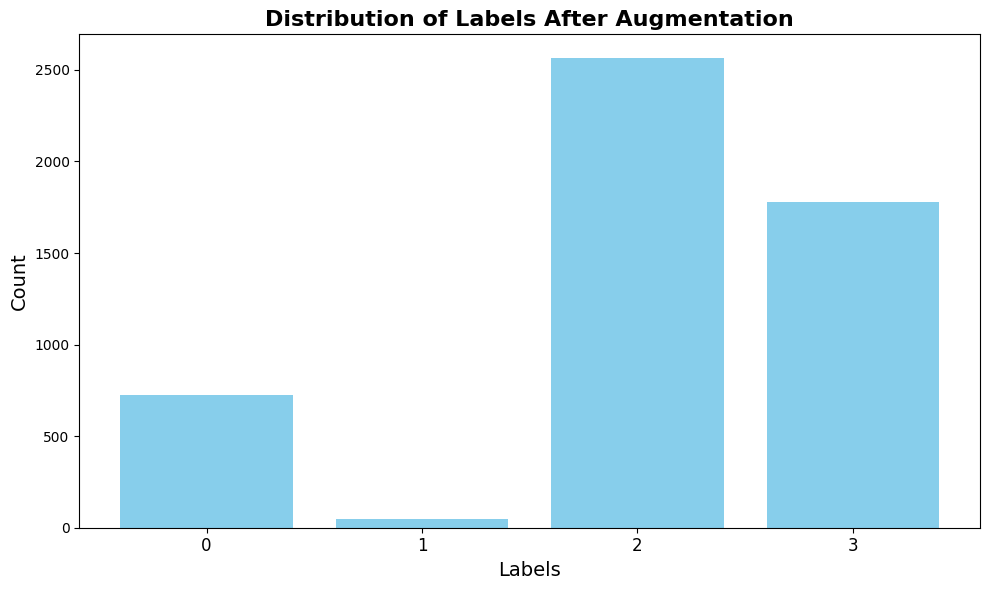

In [ ]:
from datasets import load_dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import ImageOps

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Define augmentation transformations for grayscale images
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,       # Randomly rotate by up to 15 degrees
    width_shift_range=0.1,   # Randomly shift width by up to 10%
    height_shift_range=0.1,  # Randomly shift height by up to 10%
    horizontal_flip=True,    # Randomly flip horizontally
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    zoom_range=0.2,          # Randomly zoom by up to 20%
)

# Function to convert image to grayscale
def to_grayscale(image):
    if isinstance(image, np.ndarray):
        if len(image.shape) == 3 and image.shape[-1] == 3:  # If RGB, convert to grayscale
            image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    else:  # If PIL image, convert to grayscale
        image = ImageOps.grayscale(image)
    return image

# Function to apply augmentation to a grayscale image
def augment_image(image):
    # Convert image to NumPy array if necessary
    if not isinstance(image, np.ndarray):
        image = np.array(image)  # Convert PIL image to NumPy array

    # Ensure the image has a single channel (grayscale)
    if len(image.shape) == 2:  # If grayscale, add a channel dimension
        image = np.expand_dims(image, axis=-1)  # Shape: (height, width, 1)

    # Add batch dimension: (1, height, width, 1)
    image = np.expand_dims(image, axis=0)

    # Apply augmentation
    augmented_image = next(datagen.flow(image, batch_size=1))[0]  # Use next() to get the augmented image
    return augmented_image

# Augment the dataset and collect labels
augmented_labels = []
for example in dataset:
    original_image = example['image']  # Replace 'image' with the correct key
    label = example['label']  # Replace 'label' with the correct key

    # Convert original image to grayscale
    original_grayscale = to_grayscale(original_image)

    # Augment the grayscale image
    augmented_image = augment_image(original_grayscale)

    # Append the label to the augmented_labels list
    augmented_labels.append(label)

# Count the occurrences of each label in the augmented dataset
augmented_label_counts = Counter(augmented_labels)

# Print the label distribution
print("Augmented label distribution:", augmented_label_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(augmented_label_counts.keys(), augmented_label_counts.values(), color='skyblue')

# Add labels and title
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Labels After Augmentation', fontsize=16, fontweight='bold')

# Customize x-axis to show only integer labels
plt.xticks(list(augmented_label_counts.keys()), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

> The augmentation process is not modifying the dataset or the labels. This happens because:

1. The augmentation is applied to the images, but the labels remain unchanged.

2. The augmented images are not being saved or used to update the dataset.



### Steps:
- Define Augmentation Ratios:

For each class, specify how many augmented images to generate per original image.

- Apply Augmentation:

For each image in the dataset, generate the specified number of augmented images based on its class.

- Collect Augmented Images and Labels:

Store the augmented images and their corresponding labels.

- Visualize the Distribution:

Plot the distribution of labels in the augmented dataset.

Augmented label distribution: Counter({3: 5343, 2: 5132, 0: 5068, 1: 4998})


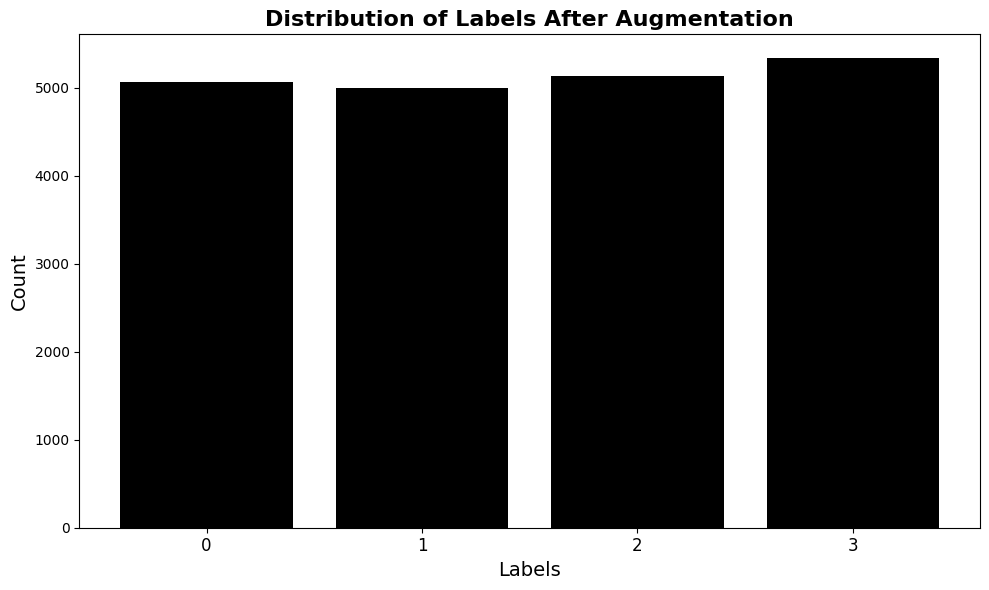

In [8]:
from datasets import load_dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import ImageOps

# Load the Falah/Alzheimer_MRI dataset
dataset = load_dataset('Falah/Alzheimer_MRI', split='train')

# Define augmentation transformations for grayscale images
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,       # Randomly rotate by up to 15 degrees
    width_shift_range=0.1,   # Randomly shift width by up to 10%
    height_shift_range=0.1,  # Randomly shift height by up to 10%
    horizontal_flip=True,    # Randomly flip horizontally
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    zoom_range=0.2,          # Randomly zoom by up to 20%
)

# Function to convert image to grayscale
def to_grayscale(image):
    if isinstance(image, np.ndarray):
        if len(image.shape) == 3 and image.shape[-1] == 3:  # If RGB, convert to grayscale
            image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)
    else:  # If PIL image, convert to grayscale
        image = ImageOps.grayscale(image)
    return image

# Function to apply augmentation to a grayscale image
def augment_image(image):
    # Convert image to NumPy array if necessary
    if not isinstance(image, np.ndarray):
        image = np.array(image)  # Convert PIL image to NumPy array

    # Ensure the image has a single channel (grayscale)
    if len(image.shape) == 2:  # If grayscale, add a channel dimension
        image = np.expand_dims(image, axis=-1)  # Shape: (height, width, 1)

    # Add batch dimension: (1, height, width, 1)
    image = np.expand_dims(image, axis=0)

    # Apply augmentation
    augmented_image = next(datagen.flow(image, batch_size=1))[0]  # Use next() to get the augmented image
    return augmented_image

# Define the number of augmented images to generate per class
augmentation_ratios = {
    0: 7,  # For class 0, generate 7 augmented images per original image
    1: 102,  # For class 1, generate 102 augmented images per original image
    2: 2,  # For class 2, generate 1 augmented image per original image
    3: 3,  # For class 3, generate 3 augmented images per original image
}

# Augment the dataset and collect labels
augmented_images = []
augmented_labels = []

for example in dataset:
    original_image = example['image']  # Replace 'image' with the correct key
    label = example['label']  # Replace 'label' with the correct key

    # Convert original image to grayscale
    original_grayscale = to_grayscale(original_image)

    # Generate augmented images based on the class
    num_augmented = augmentation_ratios.get(label, 1)  # Default to 1 if label not in augmentation_ratios
    for _ in range(num_augmented):
        augmented_image = augment_image(original_grayscale)
        augmented_images.append(augmented_image)
        augmented_labels.append(label)

# Count the occurrences of each label in the augmented dataset
augmented_label_counts = Counter(augmented_labels)

# Print the label distribution
print("Augmented label distribution:", augmented_label_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(augmented_label_counts.keys(), augmented_label_counts.values(), color='black')

# Add labels and title
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Labels After Augmentation', fontsize=16, fontweight='bold')

# Customize x-axis to show only integer labels
plt.xticks(list(augmented_label_counts.keys()), fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

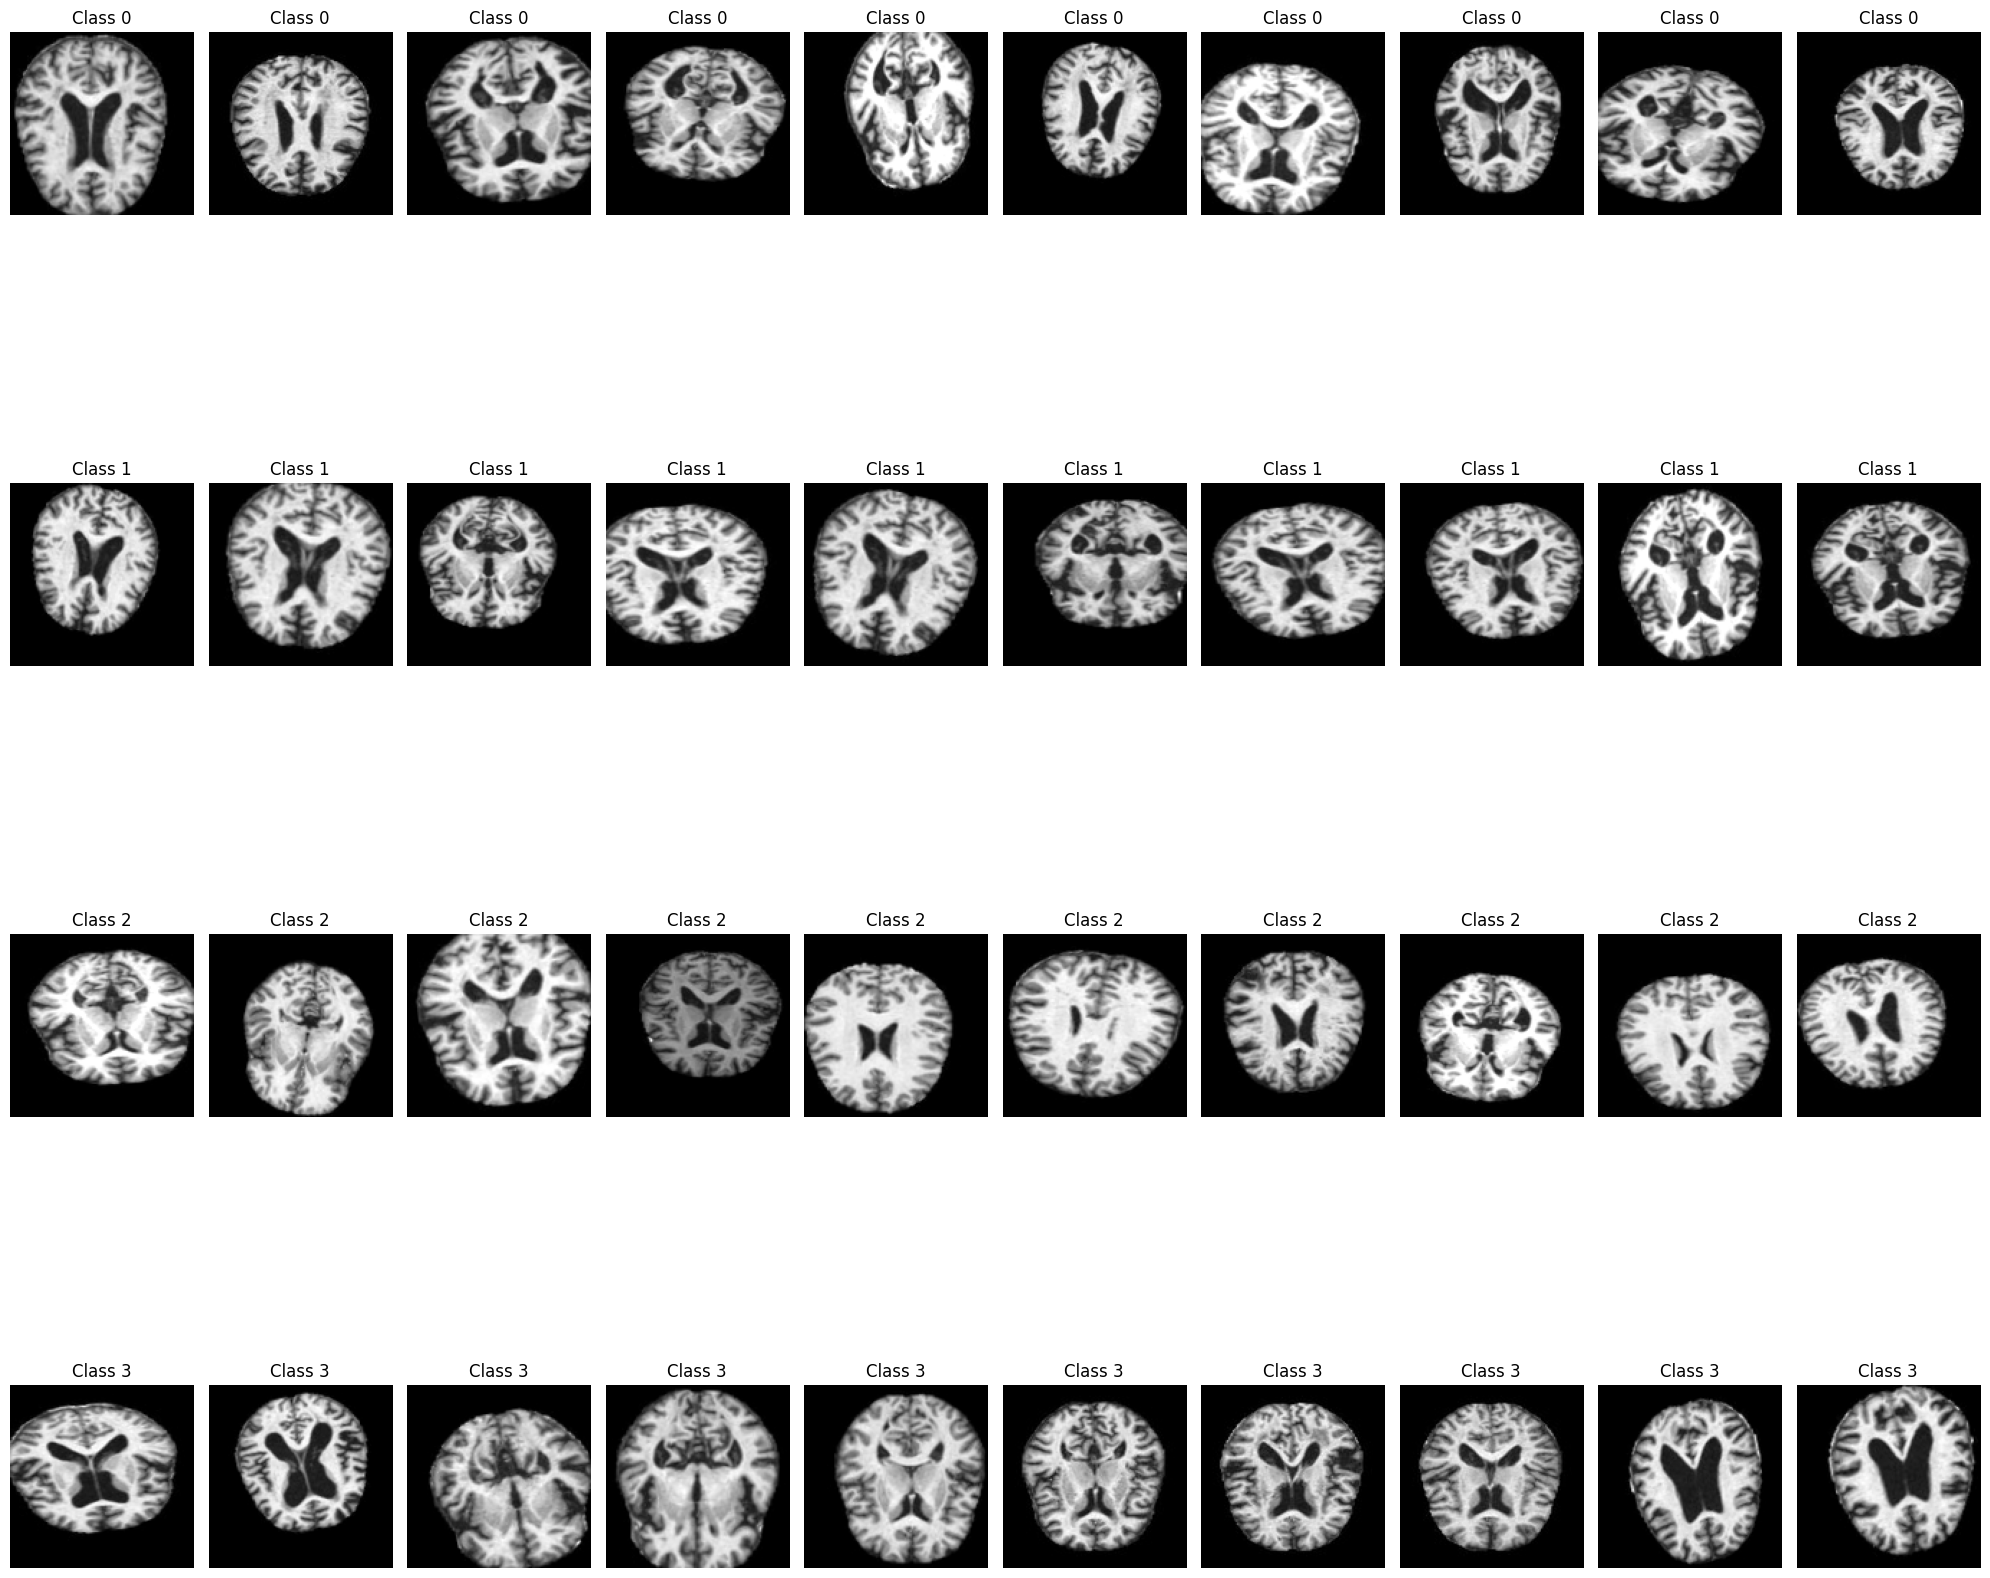

In [9]:
from collections import defaultdict
import random

# Combine original and augmented data
all_images = list(dataset['image']) + augmented_images
all_labels = list(dataset['label']) + augmented_labels

# Separate images by class
class_images = defaultdict(list)
for image, label in zip(all_images, all_labels):
    class_images[label].append(image)

# Randomly sample 10 images from each class
sampled_images = {}
for label, images in class_images.items():
    sampled_images[label] = random.sample(images, min(10, len(images)))  # Sample 10 images or all if less than 10

# Display sampled images
plt.figure(figsize=(20, 20))
for label, images in sampled_images.items():
    for i, image in enumerate(images):
        plt.subplot(4, 10, label * 10 + i + 1)  # Arrange in a grid (4 classes x 10 images)
        plt.imshow(image, cmap='gray')
        plt.title(f"Class {label}")
        plt.axis('off')

plt.tight_layout()
plt.show()

# Implementing a Diffusion Model

### Steps:
- Define the Diffusion Model:

Use a diffusion model to learn meaningful representations of the input images.

- Add a Classifier:

Add a simple classifier (e.g., a fully connected layer) on top of the diffusion model to perform classification.

- Train the Model:

Train the diffusion model and classifier jointly.

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
import numpy as np
from tqdm import tqdm
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define a directory in Google Drive to save checkpoints
checkpoint_dir = "/content/drive/My Drive/checkpoints"  # Change this to your desired folder
os.makedirs(checkpoint_dir, exist_ok=True)

# Combine original and augmented data
all_images = list(dataset['image']) + augmented_images  # Replace 'image' with the correct key
all_labels = list(dataset['label']) + augmented_labels  # Replace 'label' with the correct key

# Normalize and convert to tensors
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Convert images and labels to PyTorch tensors
images = [transform(image) for image in all_images]
images = torch.stack(images)
labels = torch.tensor(all_labels, dtype=torch.long)

# Create a PyTorch dataset and dataloader
combined_dataset = TensorDataset(images, labels)
dataloader = DataLoader(combined_dataset, batch_size=32, shuffle=True)

# Define the diffusion model (simplified for demonstration)
class DiffusionModel(nn.Module):
    def __init__(self):
        super(DiffusionModel, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (64, 64, 64)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (128, 32, 32)
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (256, 16, 16)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, kernel_size=2, stride=2),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        return x

# Define the classifier
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes),
        )

    def forward(self, x):
        return self.fc(x)

# Combine diffusion model and classifier
class DiffusionClassifier(nn.Module):
    def __init__(self, diffusion_model, classifier):
        super(DiffusionClassifier, self).__init__()
        self.diffusion_model = diffusion_model
        self.classifier = classifier

    def forward(self, x):
        features = self.diffusion_model.encoder(x)
        features = features.view(features.size(0), -1)  # Flatten features
        return self.classifier(features)

# Initialize models
diffusion_model = DiffusionModel()

# Calculate the correct input_dim for the classifier
dummy_input = torch.randn(1, 1, 128, 128)  # Adjust input size based on your image size
with torch.no_grad():
    dummy_output = diffusion_model.encoder(dummy_input)
    input_dim = dummy_output.view(1, -1).size(1)  # Flatten and get the size

print(f"Input dimension for classifier: {input_dim}")  # Debugging: Print the input_dim

classifier = Classifier(input_dim=input_dim, num_classes=4)  # Use the correct input_dim
model = DiffusionClassifier(diffusion_model, classifier)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to save a checkpoint
def save_checkpoint(epoch, model, optimizer, loss, checkpoint_dir):
    checkpoint_path = os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch}.pth")
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
    }, checkpoint_path)
    print(f"Checkpoint saved at {checkpoint_path}")

# Function to load a checkpoint
def load_checkpoint(checkpoint_path, model, optimizer):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Checkpoint loaded from {checkpoint_path} (epoch {epoch}, loss {loss})")
    return epoch

# Training loop
num_epochs = 10
start_epoch = 0

# Load the latest checkpoint if available
checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.startswith("checkpoint_epoch_")]
if checkpoint_files:
    latest_checkpoint = max(checkpoint_files, key=lambda x: int(x.split("_")[2].split(".")[0]))
    latest_checkpoint_path = os.path.join(checkpoint_dir, latest_checkpoint)
    start_epoch = load_checkpoint(latest_checkpoint_path, model, optimizer) + 1

for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(dataloader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Save checkpoint after each epoch
    save_checkpoint(epoch, model, optimizer, running_loss / len(dataloader), checkpoint_dir)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}")

print("Training complete!")

Mounted at /content/drive
Input dimension for classifier: 65536


100%|██████████| 802/802 [40:43<00:00,  3.05s/it]


Checkpoint saved at /content/drive/My Drive/checkpoints/checkpoint_epoch_0.pth
Epoch [1/10], Loss: 5.3306


 40%|████      | 321/802 [17:48<26:12,  3.27s/it]

# New Model

In [20]:
import numpy as np
import torch
from PIL import Image

def preprocess_images(images, target_size=(128, 128)):
    """
    Robust image preprocessing for Alzheimer's dataset

    Args:
    - images: List or array of input images
    - target_size: Desired output image size

    Returns:
    - Numpy array of processed images
    """
    processed_images = []

    for img in images:
        # Handle different input types
        if isinstance(img, np.ndarray):
            # Squeeze and remove extra dimensions
            while img.ndim > 2:
                img = img.squeeze(axis=-1)

            # Convert to PIL if 2D numpy array
            if img.ndim == 2:
                img = Image.fromarray(img.astype(np.uint8))
            else:
                raise ValueError(f"Unexpected image shape: {img.shape}")

        # Ensure PIL Image
        if not isinstance(img, Image.Image):
            img = Image.fromarray(np.array(img))

        # Resize and convert to grayscale
        img = img.convert('L')
        img = img.resize(target_size, Image.LANCZOS)

        # Convert to numpy array
        img_array = np.array(img).astype(np.float32)
        processed_images.append(img_array)

    # Stack images into a single numpy array
    return np.stack(processed_images)

# Usage example:
processed_images = preprocess_images(all_images)
processed_labels = np.array(all_labels)

In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from tqdm import tqdm
import numpy as np

class AlzheimersDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        # Convert to tensor using numpy to avoid OOM issues
        self.images = torch.from_numpy(np.array(images)).float()
        self.labels = torch.from_numpy(np.array(labels)).long()
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# More efficient model architecture
class EfficientClassifier(nn.Module):
    def __init__(self, num_classes=4):
        super(EfficientClassifier, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 16 * 16, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def train_model(images, labels, num_epochs=20, batch_size=32, learning_rate=0.001):
    # Preprocessing
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    # Create dataset and dataloader
    dataset = AlzheimersDataset(images, labels, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)

    # Model, loss, and optimizer
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = EfficientClassifier().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1)

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for batch_images, batch_labels in tqdm(dataloader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            batch_images, batch_labels = batch_images.to(device), batch_labels.to(device)

            optimizer.zero_grad()
            outputs = model(batch_images)
            loss = criterion(outputs, batch_labels)

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        scheduler.step(avg_loss)

        print(f'Epoch {epoch+1}: Average Loss = {avg_loss:.4f}')

    return model

# Usage would look like:
model = train_model(all_images, all_labels)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (25661, 128, 128) + inhomogeneous part.